In [1]:
from __future__ import print_function

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import sin, cos, log, log10, absolute, exp
import scipy as sp
from numpy.polynomial import chebyshev as T
from spectral_tools import Decompose, EdgeDetectT, FilterCoeff, ModalD, NodalD, Vandermonde
from edgedetect import ChebEdge, ConfigurePlots

In [2]:
step_loc = -0.7
x = np.linspace(-1.0, 1.0, 401)
chi = lambda x: 1.0 if (x>=step_loc and x<=(step_loc+1.0)) else 0

c2s, s2c = Vandermonde(32)
a_n = Decompose(chi, c2s)
modalD = ModalD(c2s)

edge = ChebEdge(a_n, x, modalD)

Check whether the edge representations make sense

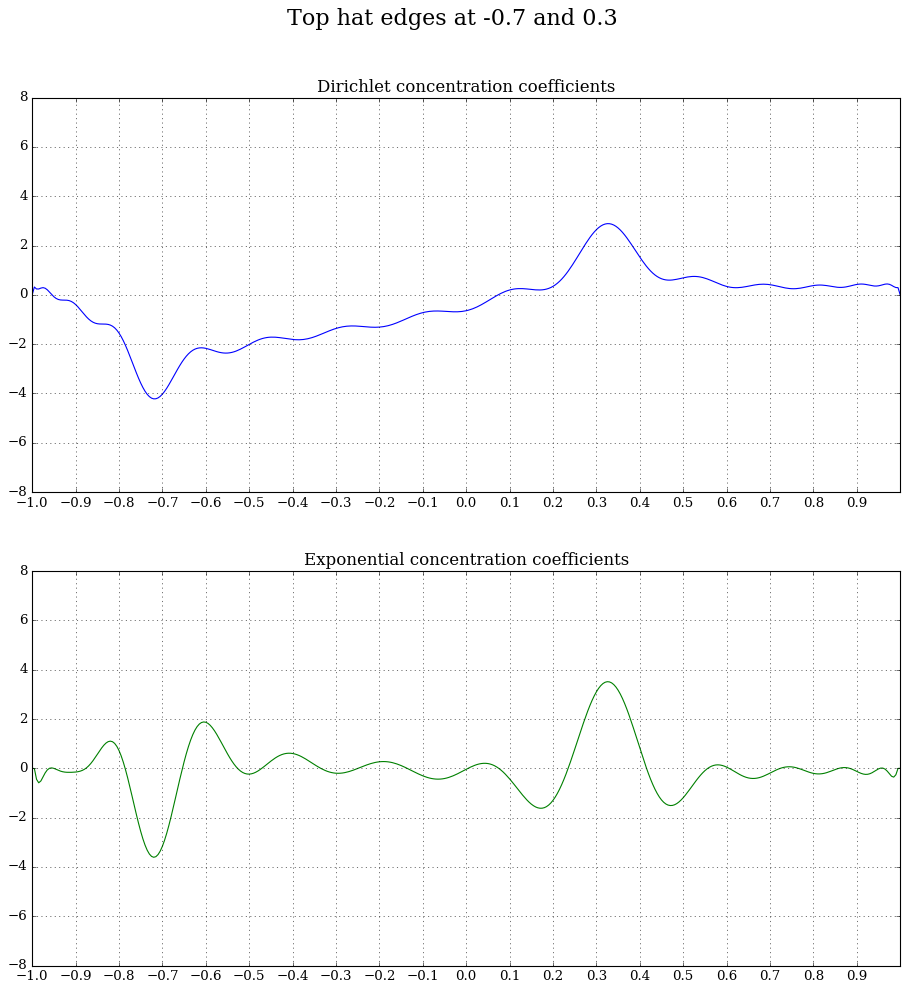

In [3]:
ConfigurePlots()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
plt.suptitle('Top hat edges at %.1f and %.1f' %(step_loc, step_loc+1.0), fontsize=20)
ax1.set_title('Dirichlet concentration coefficients')
ax2.set_title('Exponential concentration coefficients')
ax1.xaxis.set_ticks(np.arange(-1,1,0.1))
ax2.xaxis.set_ticks(np.arange(-1,1,0.1))
ax1.plot(x, edge[:,0], 'b-')
ax2.plot(x, edge[:,-1], 'g-')
plt.subplots_adjust(top=0.9)
plt.show()
plt.close()

<i><b>Comment:</b> I do not like that, it is off. Probably within a reasonable error, yet still saddening.<br>
However - the function works, so that is good</i>

The function Enhance in edgedetect.py is defined as follows:

In [4]:
def Enhance(a_n, x, edge, p):

    N = a_n.shape[0]-1
    S_N = T.chebval(x, a_n)
    
    eps = log(N)/N
    J = 0.9*(np.amax(S_N)-np.amin(S_N))*(N**2)

    edge = (eps**(-p/2))*(edge**p)
    edge[absolute(edge) <= J] = 0

    return edge

<i><b>Question:</b> Does it look appropriate or have I made something up?</i>

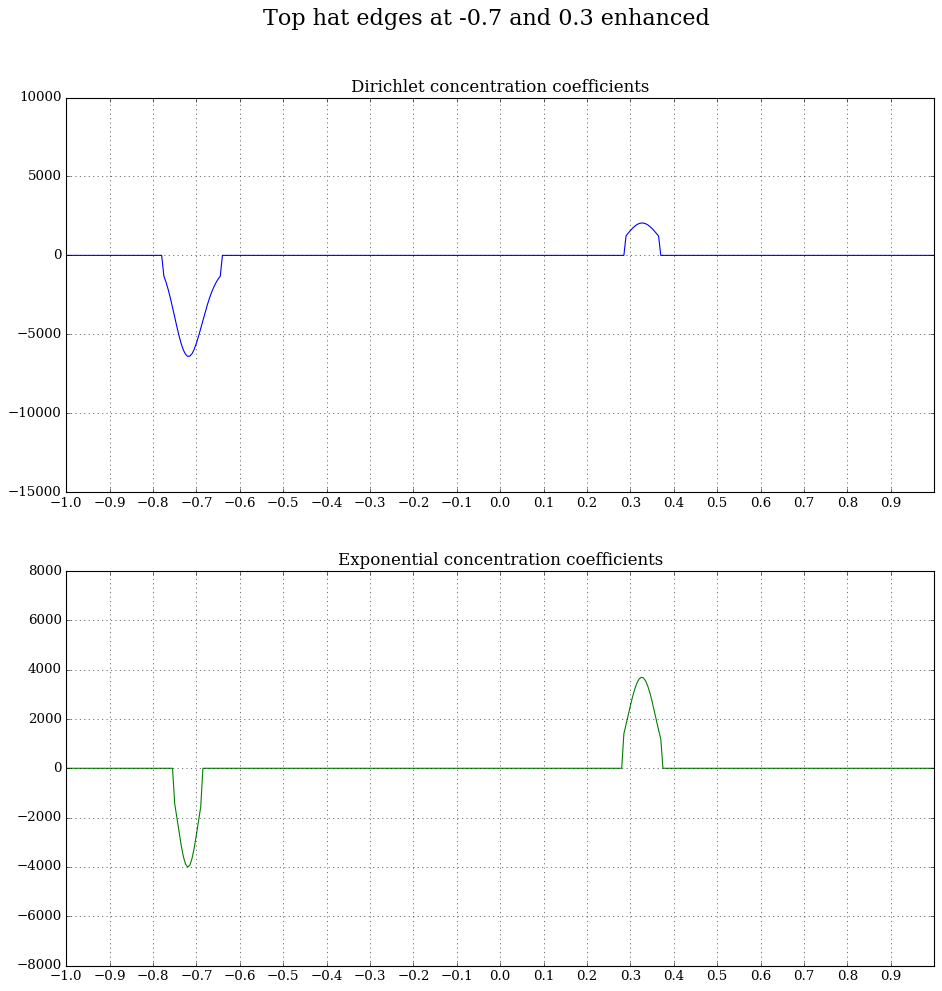

In [5]:
p = 3
enhanced_edge = Enhance(a_n, x, edge, p)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
plt.suptitle('Top hat edges at %.1f and %.1f enhanced' %(step_loc, step_loc+1.0), fontsize=20)
ax1.set_title('Dirichlet concentration coefficients')
ax2.set_title('Exponential concentration coefficients')
ax1.xaxis.set_ticks(np.arange(-1,1,0.1))
ax2.xaxis.set_ticks(np.arange(-1,1,0.1))
ax1.plot(x, enhanced_edge[:,0], 'b-')
ax2.plot(x, enhanced_edge[:,-1], 'g-')
plt.subplots_adjust(top=0.9)
plt.show()
plt.close()

<i><b>Comment:</b> Looking quite funky, overall seems to be working, am I correct, Jonah?</i>

plotting results for different p values to see general behaviour


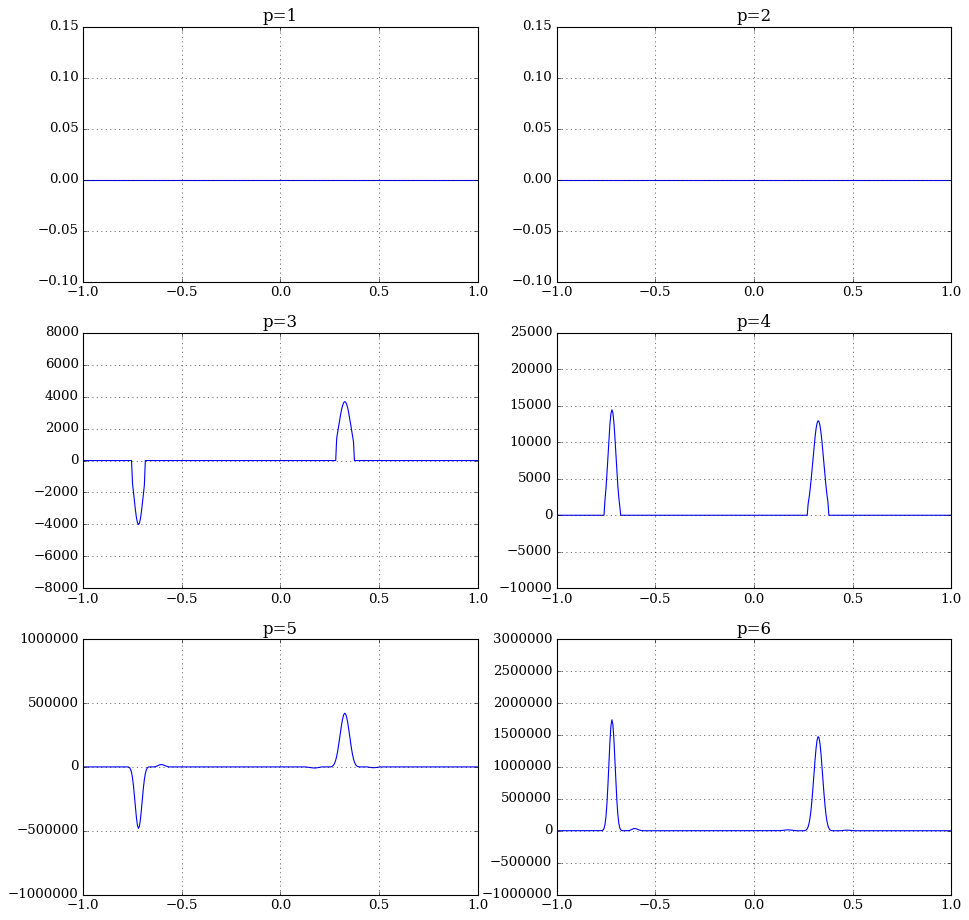

In [6]:
expon_edges = np.empty((len(x), 6))
p_val = np.arange(6)+1

for idx, p in enumerate(p_val):
    expon_edges[:,idx] = Enhance(a_n, x, edge[:,-1], p)
    
fig, axarr = plt.subplots(3,2, figsize=(14,14))
axarr[0, 0].plot(x, expon_edges[:,0])
axarr[0, 0].set_title('p=1')
axarr[0, 1].plot(x, expon_edges[:,1])
axarr[0, 1].set_title('p=2')
axarr[1, 0].plot(x, expon_edges[:,2])
axarr[1, 0].set_title('p=3')
axarr[1, 1].plot(x, expon_edges[:,3])
axarr[1, 1].set_title('p=4')
axarr[2, 0].plot(x, expon_edges[:,4])
axarr[2, 0].set_title('p=5')
axarr[2, 1].plot(x, expon_edges[:,5])
axarr[2, 1].set_title('p=6')
plt.subplots_adjust(wspace=0.2)
plt.show()
plt.close()

<i><b>Comment:</b> 
p=3 and p=4 seem to be doing a good job already, there is no need to go into higher orders, as you mention it in the report, right?</i>

Now, in an ugly for-loop, the minmod is calculated:

In [7]:
def MinMod(edge):
    
    edge_minmod = np.empty(len(edge[:,0]))
    n_e = len(edge[0,:])

    for i in range(len(edge[:,0])):
        neg = np.ma.masked_where(edge[i,:] < 0.0, edge[i,:], copy=True)
        
        if np.ma.count_masked(neg) == n_e:
            edge_minmod[i] = np.amax(edge[i,:])
        
        elif np.ma.count(neg) == n_e:
            edge_minmod[i] = np.amin(edge[i,:])

        else:
            edge_minmod[i] = 0.0

    return edge_minmod


In [8]:
edge_minmod = MinMod(edge)

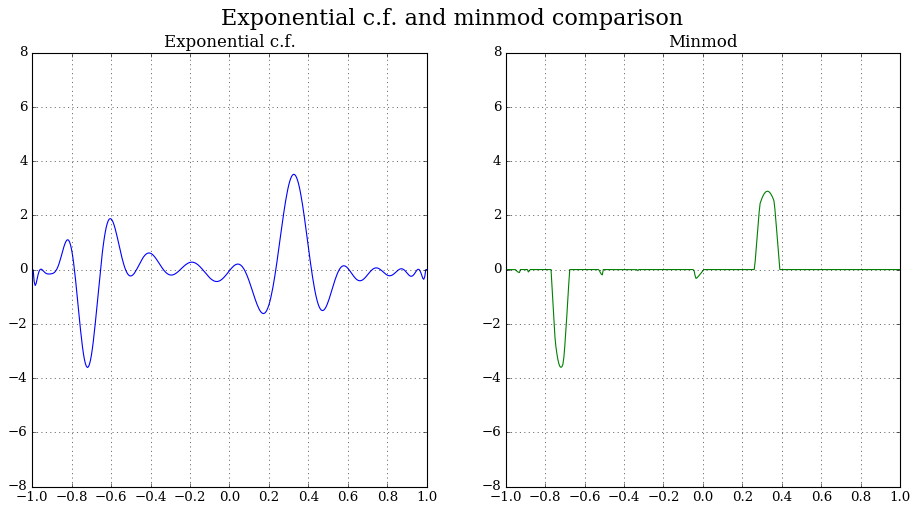

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
plt.suptitle('Exponential c.f. and minmod comparison', fontsize=20)
ax1.plot(x, edge[:,-1], 'b-')
ax2.plot(x, edge_minmod, 'g-')
ax1.set_title('Exponential c.f.')
ax2.set_title('Minmod')
ax1.xaxis.set_ticks(np.arange(-1,1.01,0.2))
ax2.xaxis.set_ticks(np.arange(-1,1.01,0.2))
plt.show()
plt.clf()


Can then add nonlinear enhancement on top:

Watch out below: absolute value of minmod plotted

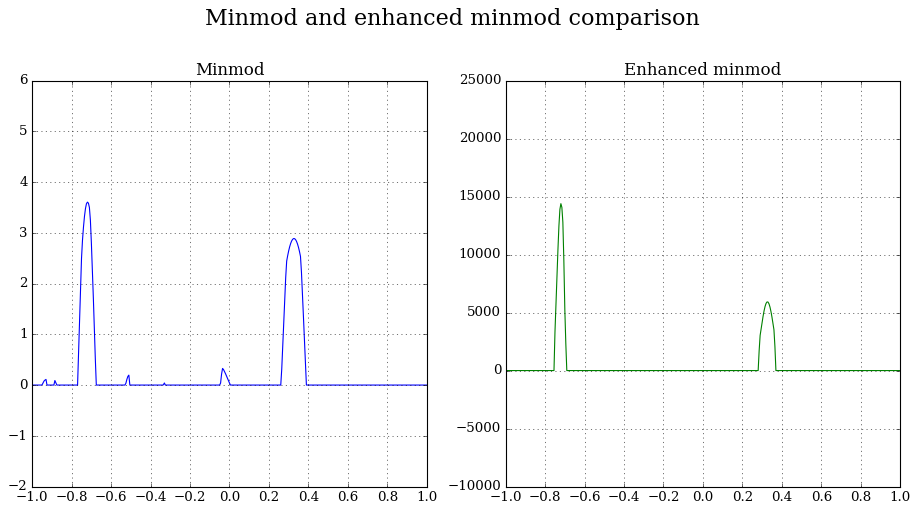

In [10]:
p=4
enhanced_edge_minmod = Enhance(a_n, x, edge_minmod, p)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
plt.suptitle('Minmod and enhanced minmod comparison', fontsize=20)
ax1.plot(x, absolute(edge_minmod), 'b-')
ax2.plot(x, enhanced_edge_minmod, 'g-')
ax1.set_title('Minmod')
ax2.set_title('Enhanced minmod')
ax1.xaxis.set_ticks(np.arange(-1,1.01,0.2))
ax2.xaxis.set_ticks(np.arange(-1,1.01,0.2))
plt.subplots_adjust(top=0.85)
plt.show()
plt.clf()

Let's play around with the peakutils package

In [11]:
import peakutils

In [12]:
indexes = peakutils.indexes(absolute(enhanced_edge_minmod))

for i, idx in enumerate(indexes):
    print('Edge at x=%f'%x[idx])
    

Edge at x=-0.720000
Edge at x=0.325000


In [13]:
indexes_interpolated = peakutils.interpolate(x, enhanced_edge_minmod, ind=indexes)
for pos in indexes_interpolated:
    print('Edge at x=%f' %pos)

Edge at x=-0.721573
Edge at x=0.326366


# Numerical comparison of non-linear enhancement, minmod and enhancement-minmod combined

Having played around (for far too long!) with the error dependence on different factors I found no difference between the errors in enhanced-minmod procedure and minmod - one is a stretched-out version of the other, so the peak location does not move. What's even more important is that enhancement is rather <b>required</b>, as means to ensure correct peak detection by the peakutils.<br>
To show the lack of influence on error magnitude, error vs N plotted below for N in [16,64], step location at -0.4 and 0.6:

In [14]:
x = np.linspace(-1.0, 1.0, 1000)

def Compare1(step_loc):
    width = 1.0
    chi = lambda x: 1.0 if (x>=step_loc and x<=(step_loc+width)) else 0
    steps = np.array([step_loc, step_loc+width])

    N_val = np.arange(16,64,2)
    error_N = np.empty((len(N_val), 4))

    for idx, N in enumerate(N_val):
        c2s, s2c = Vandermonde(N)
        a_n = Decompose(chi, c2s)
        modalD = ModalD(c2s)
        edge = ChebEdge(a_n, x, modalD)
    
        minmod_edge = MinMod(edge)
        idx_me = peakutils.indexes(absolute(minmod_edge))
        peaks_me = peakutils.interpolate(x, absolute(minmod_edge), ind=idx_me)
    
        enhanced_minmod = Enhance(a_n, x, minmod_edge, 4)
        idx_eme = peakutils.indexes(absolute(enhanced_minmod))
        peaks_eme = peakutils.interpolate(x, absolute(enhanced_minmod), ind=idx_eme)
 
        err_me = absolute(steps-peaks_me)
        err_eme = absolute(steps-peaks_eme)
        error_N[idx,:] = np.hstack((err_me, err_eme))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
    plt.suptitle('Error in the location of peaks vs N', fontsize=20)
    ax1.grid(True, which='both'), ax2.grid(True, which='both')
    ax1.set_title('peak 1'), ax2.set_title('peak 2')
    ax1.set_xlabel('N'), ax2.set_xlabel('N')
    ax1.set_ylabel('Error'), ax2.set_ylabel('Error')
    ax1.semilogy(N_val, error_N[:,0], 'go-', label='minmod')
    ax1.semilogy(N_val, error_N[:,2], 'ro-', label='enhanced minmod')
    ax2.semilogy(N_val, error_N[:,1], 'go-', label='minmod')
    ax2.semilogy(N_val, error_N[:,3], 'ro-', label='enhanced minmod')
    ax1.legend(), ax2.legend()

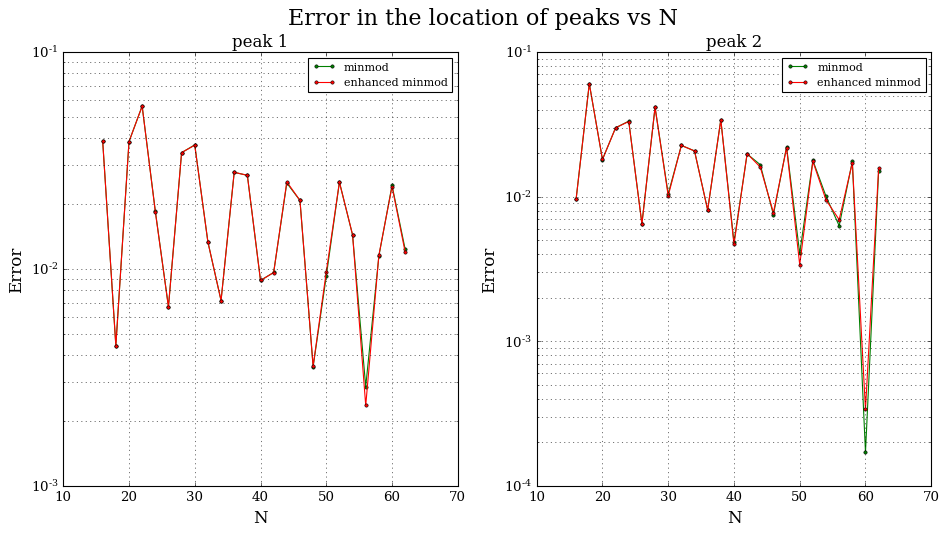

In [15]:
Compare1(-0.4)

<b>NOTICE:</b> the error distribution is different for the two peaks and does depend on the location of the edge. If I reverse the symmetry, i.e. change locations to -0.6 and 0.4, I shall get this:

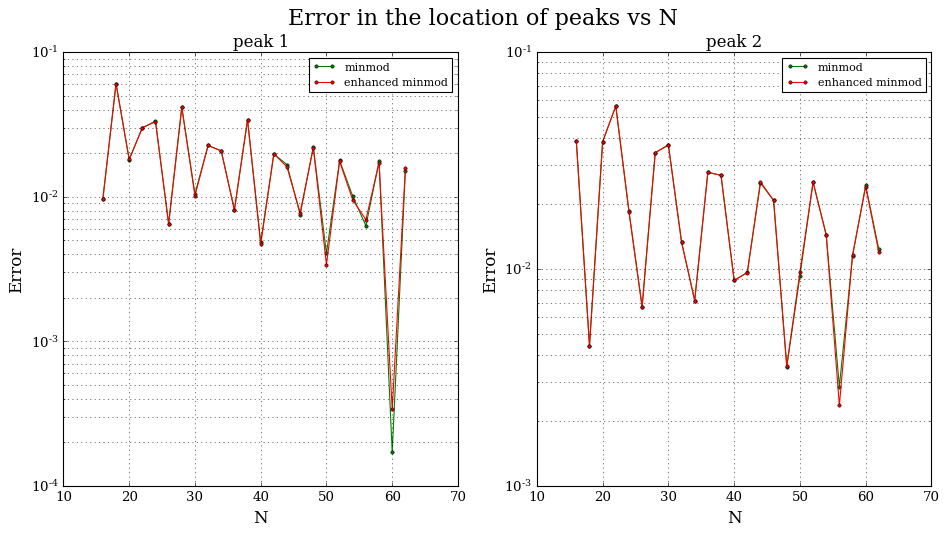

In [16]:
Compare1(-0.6)

As expected, mirror situation. (Sanity check!). <br>
For -0.5, 0.5 however, we expect symmetry in error behaviour, which is seen:

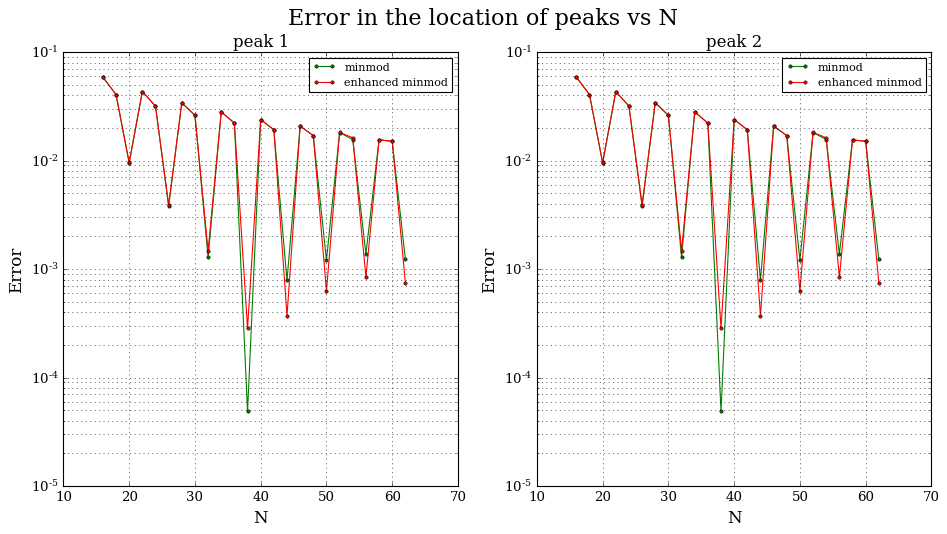

In [17]:
Compare1(-0.5)

Peculiar N=38 visualised below:

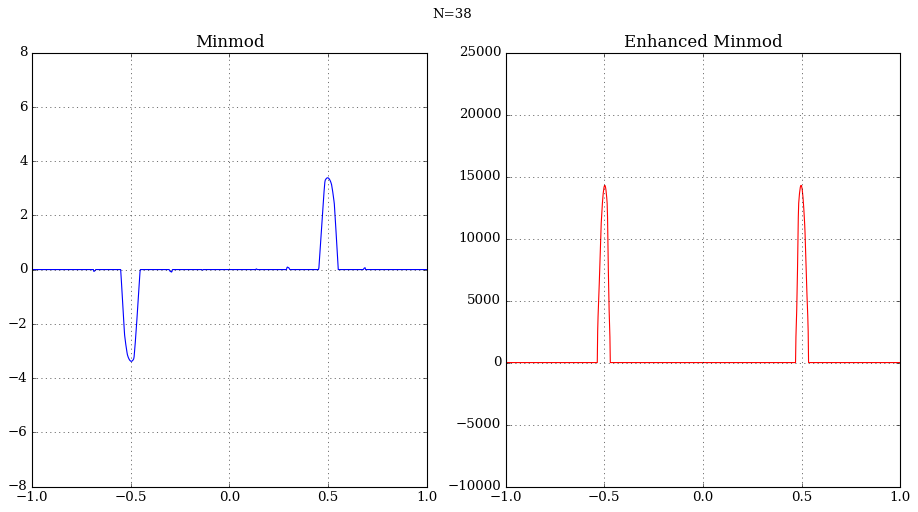

In [18]:
N = 38
p = 4
step_loc = -0.5
width = 1.0
chi = lambda x: 1.0 if (x>=step_loc and x<=(step_loc+width)) else 0
c2s, s2c = Vandermonde(N)
a_n = Decompose(chi, c2s)
modalD = ModalD(c2s)
edge = ChebEdge(a_n, x, modalD)
minmod_edge = MinMod(edge)
enhanced_minmod = Enhance(a_n, x, minmod_edge, p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
plt.suptitle('N=38')
ax1.set_title('Minmod')
ax2.set_title('Enhanced Minmod')
ax1.plot(x, minmod_edge, 'b-')
ax2.plot(x, enhanced_minmod, 'r-')

The minmod peaks are slightly 'scewed' and enhancing them by making them thinner does not lead to a better result, when the peakutils code fits a narrow Gaussian around them.

<b>Errors on individual filters after enhancement vs minmod</b><br>
Error vs N plot for individual filters and minmod calculated and presented below

(<matplotlib.legend.Legend at 0x11484c590>,
 <matplotlib.legend.Legend at 0x115378d90>)

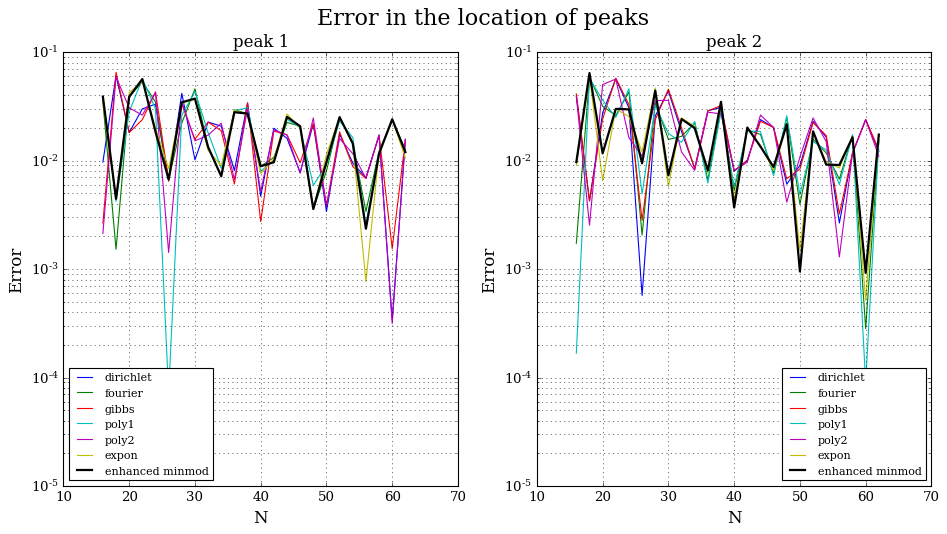

In [19]:
import sys

step_loc = -0.4
width = 1.0
chi = lambda x: 1.0 if (x>=step_loc and x<=(step_loc+width)) else 0
steps = np.array([step_loc, step_loc+width])
N_val = np.arange(16,64,2)
error_N = np.empty((len(N_val), 14))

for idx, N in enumerate(N_val):
    c2s, s2c = Vandermonde(N)
    a_n = Decompose(chi, c2s)
    modalD = ModalD(c2s)
    edge = ChebEdge(a_n, x, modalD)
    
    minmod_edge = MinMod(edge)
    enhanced_minmod = Enhance(a_n, x, minmod_edge, 4)
    idx_eme =  peakutils.indexes(absolute(enhanced_minmod))
    peaks_eme = peakutils.interpolate(x, absolute(enhanced_minmod), ind=idx_eme)
    peaks_indiv = np.empty((len(edge[0,:]), 2))
        
    for n, f in enumerate(edge[0,:]):
        enhanced_f = Enhance(a_n, x, edge[:,n], 4)
        idx_f = peakutils.indexes(absolute(enhanced_f))
        peaks_indiv[n,:] = peakutils.interpolate(x, absolute(enhanced_f), ind=idx_eme)
    
    err_eme = absolute(steps-peaks_eme)
    err_indiv = absolute(steps-peaks_indiv)
    err_indiv_flat = err_indiv.flatten()
    error_N[idx,:] = np.hstack((err_eme, err_indiv_flat))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
plt.suptitle('Error in the location of peaks', fontsize=20)
ax1.set_xlabel('N'), ax1.set_ylabel('Error')
ax2.set_xlabel('N'), ax2.set_ylabel('Error')
ax1.grid(True, which='both'), ax2.grid(True, which='both')
ax1.set_title('peak 1'), ax2.set_title('peak 2')
ax1.semilogy(N_val, error_N[:,1], label='dirichlet')
ax1.semilogy(N_val, error_N[:,2], label='fourier')
ax1.semilogy(N_val, error_N[:,3], label='gibbs')
ax1.semilogy(N_val, error_N[:,4], label='poly1')
ax1.semilogy(N_val, error_N[:,5], label='poly2')
ax1.semilogy(N_val, error_N[:,6], label='expon')
ax1.semilogy(N_val, error_N[:,0], 'k-', lw=2, label='enhanced minmod')
ax2.semilogy(N_val, error_N[:,8], label='dirichlet')
ax2.semilogy(N_val, error_N[:,9], label='fourier')
ax2.semilogy(N_val, error_N[:,10], label='gibbs')
ax2.semilogy(N_val, error_N[:,11], label='poly1')
ax2.semilogy(N_val, error_N[:,12], label='poly2')
ax2.semilogy(N_val, error_N[:,13], label='expon')  
ax2.semilogy(N_val, error_N[:,7], 'k-', lw=2, label='enhanced minmod')
ax1.legend(loc='lower left'), ax2.legend(loc='lower right')

As it can be seen, the errors are randomly all over the place, without any specific coefficient performing better on average than the others. The enhanced minmod seems to trace out an averaged value of error for both peaks

<b>IMPORTANT!</b> The behaviour of average error on location of the two points depends on the location of the peaks, as well as the width of the top hat function itself. To take a look at the mutual dependencies I will plot the error on individual peaks locations/average error on peak location as a function of both edge position and top-hat width for fixed N. <br>
<br>
<b>Dependence of errors on various symmetries of the problem</b><br>
Fixed N, varied location of the first peak

In [20]:
x = np.linspace(-1.0, 1.0, 1001)
width = 1.0
step_locs = np.arange(-0.95, -0.05, 0.025)
step_locs2 = step_locs + width

def Compare2(step_locs):
    error_s = np.empty((len(step_locs), 8))
    N_val = np.array([32,40,56,64])

    for idx, N in enumerate(N_val):
        c2s, s2c = Vandermonde(N)
        modalD = ModalD(c2s)
        
        for idx2, s in enumerate(step_locs):
            steps = np.array([s, s+width])
            if s+width < s:
                steps = np.array([s+width, s])
            chi = lambda x: 1.0 if (x>=s and x<=(s+width)) else 0
            a_n = Decompose(chi, c2s)
            edge = ChebEdge(a_n, x, modalD)
    
            minmod_edge = MinMod(edge)
            idx_me = peakutils.indexes(absolute(minmod_edge))
            peaks_me = peakutils.interpolate(x, absolute(minmod_edge), ind=idx_me)
            
            err_me = absolute(steps-peaks_me)
            error_s[idx2,2*idx:2*idx+2] = err_me
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
    plt.suptitle('Error in the location of peaks', fontsize=20)
    ax1.set_xlabel('position of the edge'), ax1.set_ylabel('Error')
    ax2.set_xlabel('position of the edge'), ax1.set_ylabel('Error')
    ax1.grid(True, which='both'), ax2.grid(True, which='both')
    ax1.set_title('peak 1'), ax2.set_title('peak 2')
    ax1.semilogy(step_locs, error_s[:,0], label='N=32')
    ax1.semilogy(step_locs, error_s[:,2], label='N=40')
    ax1.semilogy(step_locs, error_s[:,4], label='N=56')
    ax1.semilogy(step_locs, error_s[:,6], label='N=64')
    ax2.semilogy(step_locs2, error_s[:,1], label='N=32')
    ax2.semilogy(step_locs2, error_s[:,3], label='N=40')
    ax2.semilogy(step_locs2, error_s[:,5], label='N=56')
    ax2.semilogy(step_locs2, error_s[:,7], label='N=64')
    ax1.legend(loc='lower left'), ax2.legend(loc='lower left')

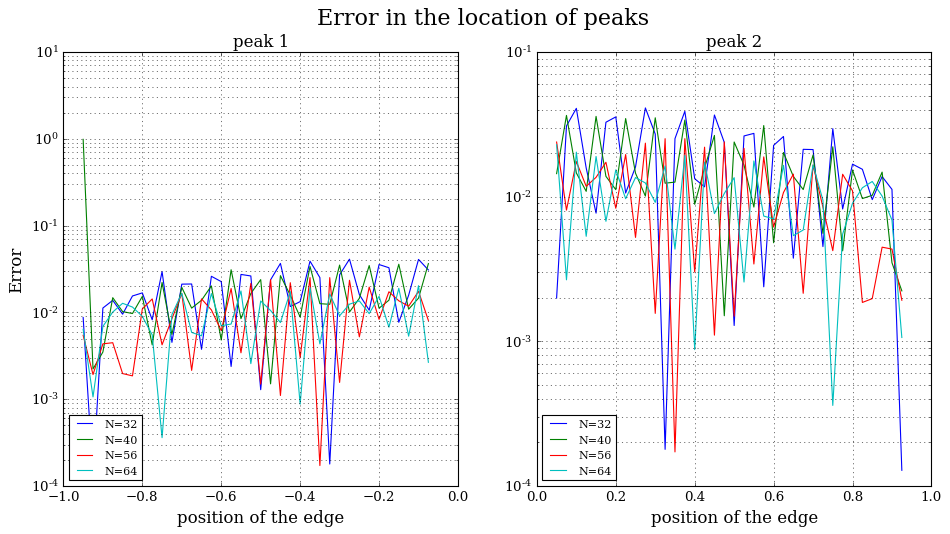

In [21]:
Compare2(step_locs)

<b>Comment:</b> No particularly strong dependence on position. There seem to be a couple of 'lucky spots' for different numbers of modes and general tendency for error to be a bit smaller at the edges. Otherwise no dependence

<b>Dependence of error on various edge separations</b>

In [22]:
x = np.linspace(-1.0, 1.0, 1001)
widths = np.arange(0.1, 1.5, 0.05)
step_loc = -0.6

def Compare3(widths):
    error_w = np.empty((len(widths), 8))
    N_val = np.array([32,40,56,64])

    for idx, N in enumerate(N_val):
        c2s, s2c = Vandermonde(N)
        modalD = ModalD(c2s)
        
        for idx2, w in enumerate(widths):
        
            chi = lambda x: 1.0 if (x>=step_loc and x<=(step_loc+w)) else 0
            a_n = Decompose(chi, c2s)
            edge = ChebEdge(a_n, x, modalD)
            steps = np.array([step_loc, step_loc+w])
    
            minmod_edge = MinMod(edge)
            idx_me = peakutils.indexes(absolute(minmod_edge))
            peaks_me = peakutils.interpolate(x, absolute(minmod_edge), ind=idx_me)
            
            err_me = absolute(steps-peaks_me)
            error_w[idx2,2*idx:2*idx+2] = err_me
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
    plt.suptitle('Error in the location of peaks', fontsize=20)
    ax1.set_xlabel('Top hat width'), ax1.set_ylabel('Error')
    ax2.set_xlabel('Top hat width'), ax1.set_ylabel('Error')
    ax1.grid(True, which='both'), ax2.grid(True, which='both')
    ax1.set_title('peak 1'), ax2.set_title('peak 2')
    ax1.semilogy(widths, error_w[:,0], label='N=32')
    ax1.semilogy(widths, error_w[:,2], label='N=40')
    ax1.semilogy(widths, error_w[:,4], label='N=56')
    ax1.semilogy(widths, error_w[:,6], label='N=64')
    ax2.semilogy(widths, error_w[:,1], label='N=32')
    ax2.semilogy(widths, error_w[:,3], label='N=40')
    ax2.semilogy(widths, error_w[:,5], label='N=56')
    ax2.semilogy(widths, error_w[:,7], label='N=64')
    ax1.legend(loc='lower left'), ax2.legend(loc='lower left')

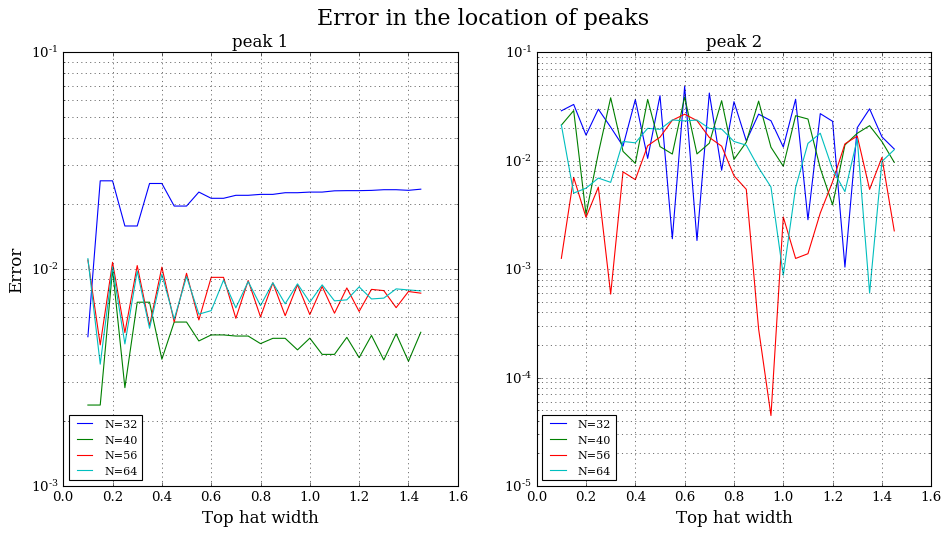

In [23]:
Compare3(widths)

<b>Comment:</b> Again, there seem to be some 'more lucky' configurations but the error does not seem to be critically affected by the top hat width